# Reconstruction Sandbox
This notebook is a test-bed for regularization and reconstruction methods

In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

# Load motiondeblur module and Dataset class
import libwallerlab.projects.motiondeblur as md
from libwallerlab.utilities.io import Dataset, isDataset

# Platform imports
import os, glob

# Debugging imports
import llops as yp
import matplotlib.pyplot as plt
import ndoperators as ops

yp.config.setDefaultBackend('arrayfire')
yp.config.setDefaultDatatype('float32')

## Load Data

In [2]:
# Define user for path setting
dataset_path = '/Users/zfphil/datasets/motiondeblur/'

# Define which dataset to use
dataset_type = 'coded'
dataset_label =  'res'

# Find files in this directory
folder_list = glob.glob(os.path.join(dataset_path, '*/'))
dataset_list = [folder for folder in folder_list if isDataset(folder)]

# Filter datasets in directory
filtered_dataset_list = [folder_name for folder_name in folder_list if (dataset_type in folder_name) and (dataset_label in folder_name)]
assert not len(filtered_dataset_list) > 1, "More than one dataset with criterion found!"
assert not len(filtered_dataset_list) == 0, "No dataset with criterion found!"

# Create dataset object (loads metadata)
dataset = Dataset(filtered_dataset_list[0], use_experimental_background=False)

# Force type to be motiondeblur
dataset.metadata.type = 'motiondeblur'

# Select green channel
dataset.channel_mask = [0]

# Preprocess dataset (md-specific)
md.preprocess(dataset)

Loading 1 frames...


# Create Reconstruction Object

In [3]:
## Set position segment
dataset.position_segment_indicies = [3]

# Create recon object
recon = md.recon.Reconstruction(dataset, alpha_blend_distance=1000,
                                use_psf=True,
                                use_phase_ramp_for_blur_vectors=True,
                                kernel_corrections={})

# Register Measurements
# offsets = recon.register_measurements(method='xc', preprocess_methods=['normalize', 'highpass'], axis=1, debug=True, write_results=True)

Loading 6 frames...


## Try Single-Frame Recon with Additional Information (Overlap and Save)

Minimizing function:


<IPython.core.display.Latex object>

|  Iter  |      Cost      | Elapsed time (s) |  Norm of Step  | Memory Usage (CPU/GPU) |
+ ------ + -------------- + ---------------- + -------------- + ---------------------- +
|    0   |    4.12e+05    |       0.00       |    0.00e+00    |  364.5 MB /  497.0 MB  |
|   25   |    7.82e+01    |       5.19       |    1.55e+00    |  365.2 MB /  516.8 MB  |
|   50   |    2.37e+01    |      10.30       |    8.91e-01    |  365.3 MB /  516.8 MB  |
|   75   |    1.04e+01    |      15.30       |    6.48e-01    |  365.4 MB /  516.8 MB  |
|  100   |    5.79e+00    |      20.21       |    4.42e-01    |  365.4 MB /  516.8 MB  |
|  125   |    3.48e+00    |      25.15       |    3.45e-01    |  365.4 MB /  516.8 MB  |
|  150   |    2.37e+00    |      30.02       |    2.08e-01    |  365.4 MB /  516.8 MB  |
|  175   |    1.64e+00    |      34.88       |    1.68e-01    |  365.4 MB /  516.8 MB  |
|  200   |    1.31e+00    |      39.83       |    1.41e-01    |  365.5 MB /  516.8 MB  |
|  225   |    9.92e-0

<IPython.core.display.Javascript object>


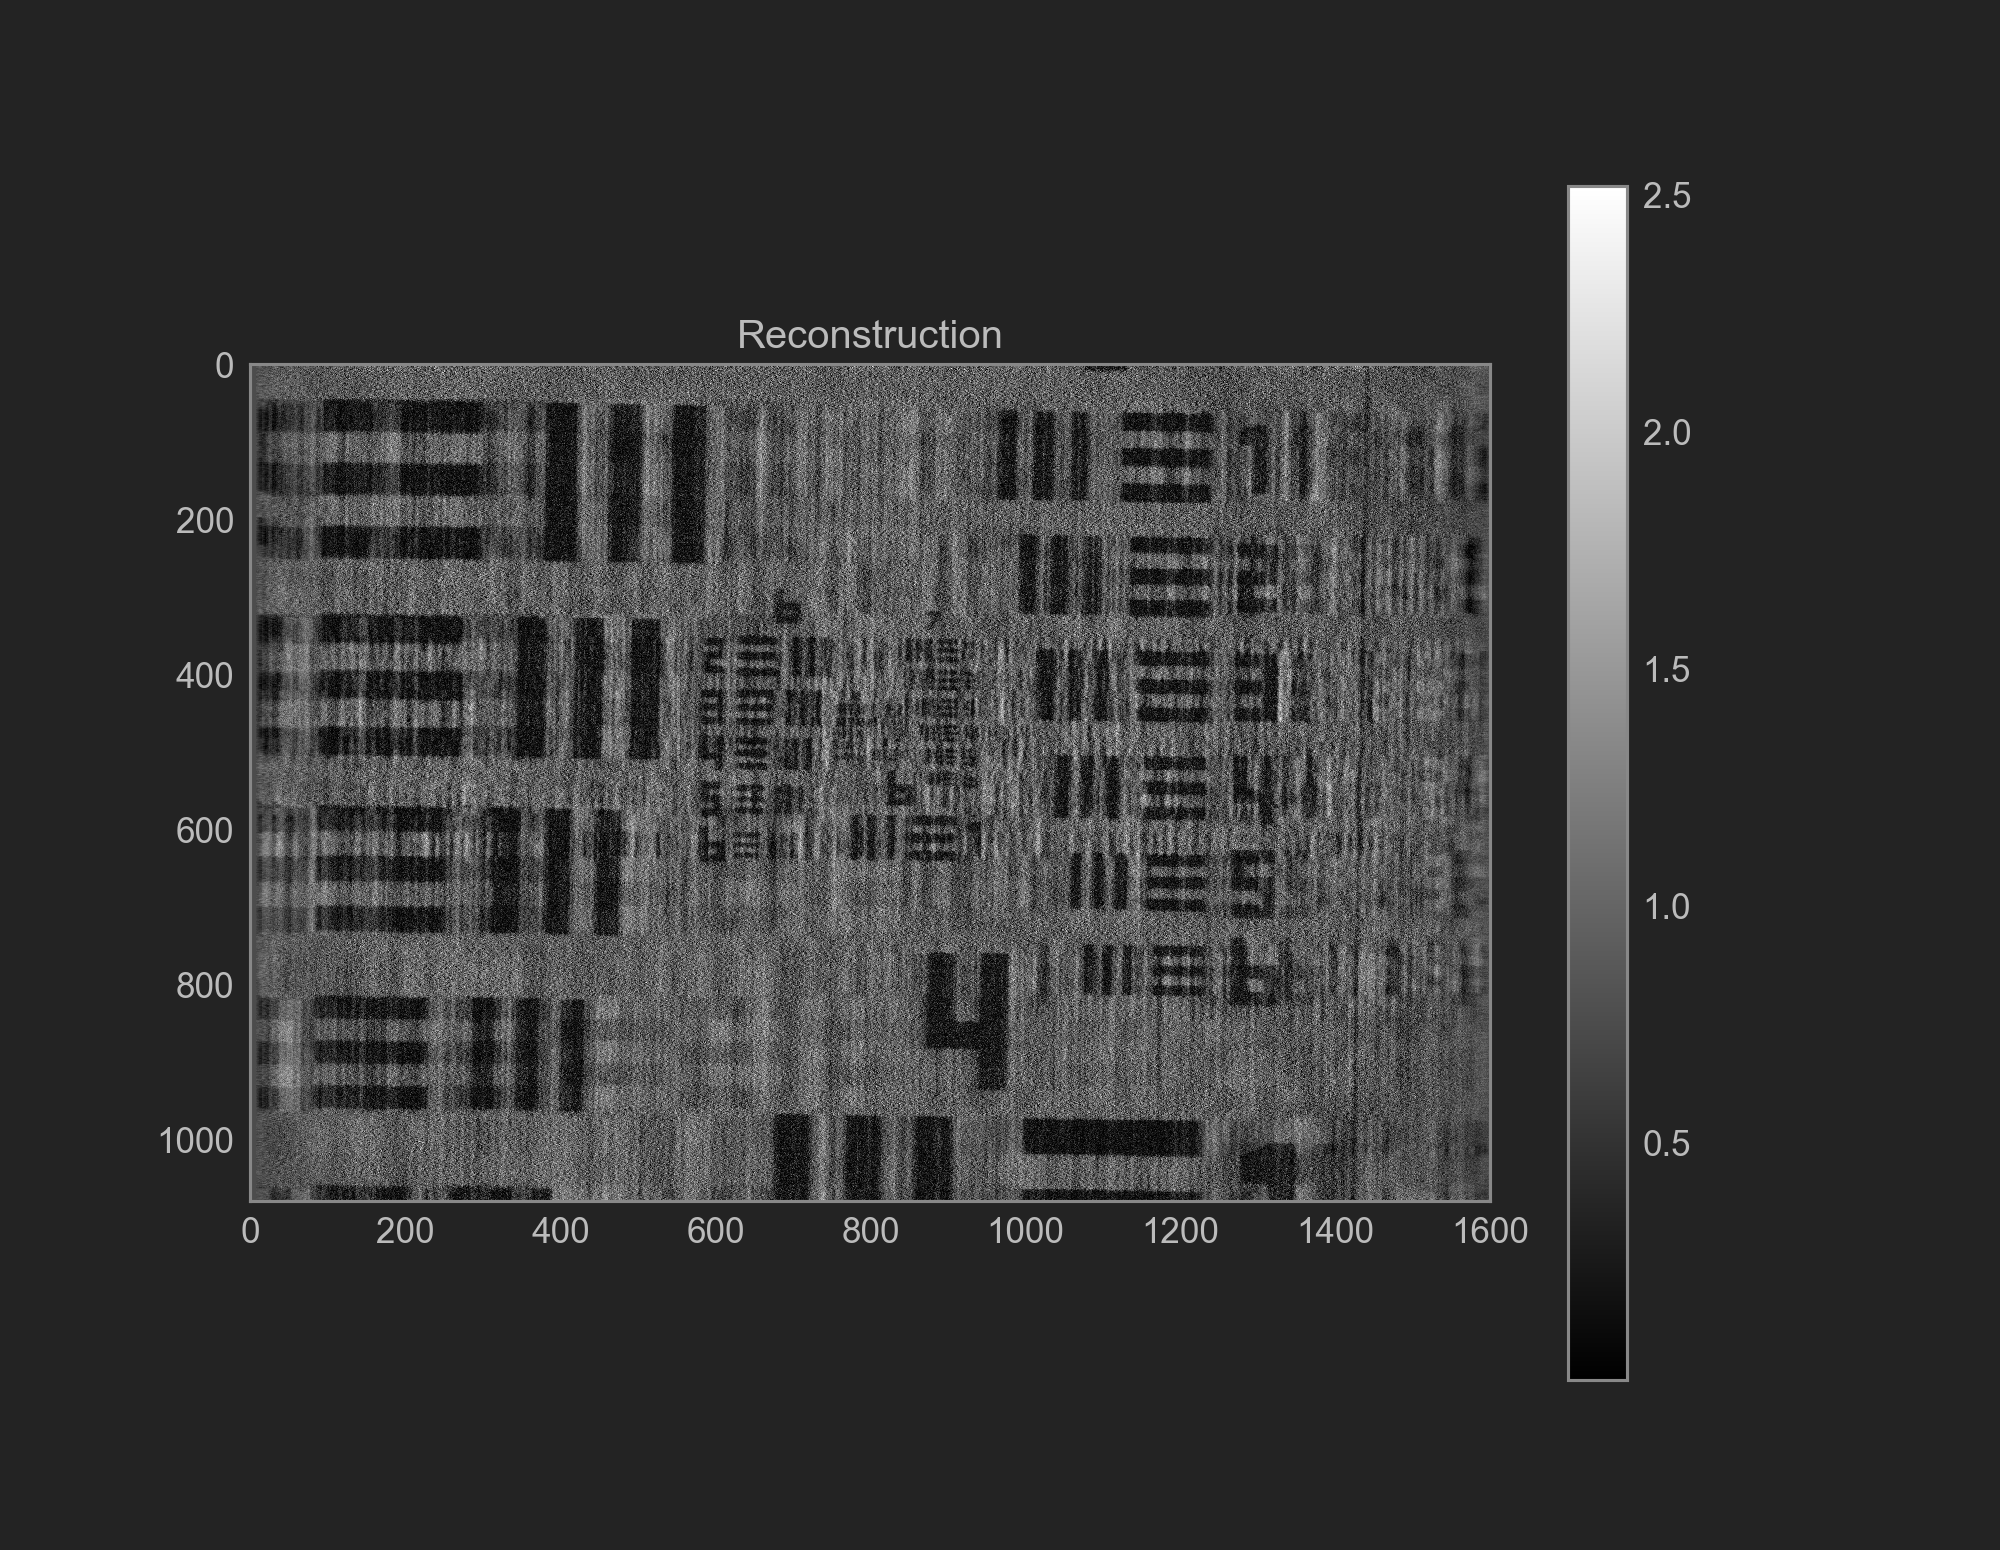

In [4]:
#mean
recon.reconstruct(250, step_size=1, frame_number=3, mode='single', reg_types={})

recon.show()

In [ ]:
C.H * CR.H (y - CR * C * x)

In [ ]:
H = ops.solvers.regularizers.Haar(dataset.frame_shape, 'H', recon.dtype, recon.backend)

plt.figure()
plt.imshow(H.H * H * recon.y_list[0])

In [ ]:
# # edge
# recon.reconstruct(100, step_size=1, frame_number=3, mode='single', reg_types={})

# recon.show()

In [ ]:
recon.reconstruct(-1, step_size=1, frame_number=3, mode='single', reg_types={'wavelet': 3e-4})

recon.show()